https://www.datacamp.com/courses/merging-dataframes-with-pandas
# Medals in Summer Olympics
## Methods for loading files
- pd.read_csv( )
- Looping over files: pd.read_csv(f) for f in glob('*.csv')

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
editions1 = pd.read_csv('datasets/Summer Olympic medals/Summer Olympic medalists 1896 to 2008 - EDITIONS.tsv', sep='\t')
editions1.head(3)

,Edition,Bronze,Gold,Silver,Grand Total,City,Country
0,1896,40,64,47,151,Athens,Greece
1,1900,142,178,192,512,Paris,France
2,1904,123,188,159,470,St. Louis,United States


In [31]:
editions = editions1[['Edition', 'Grand Total', 'City', 'Country']]
editions.head(3)

,Edition,Grand Total,City,Country
0,1896,151,Athens,Greece
1,1900,512,Paris,France
2,1904,470,St. Louis,United States


In [32]:
codes = pd.read_csv('datasets/Summer Olympic medals/Summer Olympic medalists 1896 to 2008 - IOC COUNTRY CODES.csv')
codes.head(3)

,Country,NOC,ISO code
0,Afghanistan,AFG,AF
1,Albania,ALB,AL
2,Algeria,ALG,DZ


In [33]:
codes = codes[['Country', 'NOC']]
codes.head(3)

,Country,NOC
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,ALG


In [40]:
medals = pd.read_csv('datasets/Summer Olympic medals/Summer Olympic medalists 1896 to 2008 - ALL MEDALISTS.tsv', sep='\t')
medals.head(3)

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze


In [46]:
medal_count = medals.pivot_table(index='Edition', values='Athlete', columns='NOC', aggfunc='count')
medal_count.head()

NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Edition,,,,,,,,,,,,,,,,,,,,,
1896,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,NaN,NaN,...,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0
1900,NaN,NaN,NaN,NaN,NaN,NaN,5.0,6.0,NaN,NaN,...,NaN,NaN,55.0,NaN,NaN,NaN,NaN,NaN,NaN,34.0
1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,394.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0
1908,NaN,NaN,NaN,19.0,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1912,NaN,NaN,NaN,10.0,NaN,NaN,NaN,14.0,NaN,NaN,...,NaN,NaN,101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Computing fraction of medals per Olympic edition

In [49]:
editions.set_index('Edition').head()

,Grand Total,City,Country
Edition,,,
1896,151,Athens,Greece
1900,512,Paris,France
1904,470,St. Louis,United States
1908,804,London,United Kingdom
1912,885,Stockholm,Sweden


In [55]:
# Divide medal_counts by totals: fractions
fractions = medal_count.divide(editions.set_index('Edition')['Grand Total'], axis='rows')
fractions.head()

NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Edition,,,,,,,,,,,,,,,,,,,,,
1896,NaN,NaN,NaN,NaN,NaN,NaN,0.013245,0.033113,NaN,NaN,...,NaN,NaN,0.132450,NaN,NaN,NaN,NaN,NaN,NaN,0.039735
1900,NaN,NaN,NaN,NaN,NaN,NaN,0.009766,0.011719,NaN,NaN,...,NaN,NaN,0.107422,NaN,NaN,NaN,NaN,NaN,NaN,0.066406
1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002128,NaN,NaN,...,NaN,NaN,0.838298,NaN,NaN,NaN,NaN,NaN,NaN,0.017021
1908,NaN,NaN,NaN,0.023632,NaN,NaN,NaN,0.001244,NaN,NaN,...,NaN,NaN,0.078358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1912,NaN,NaN,NaN,0.011299,NaN,NaN,NaN,0.015819,NaN,NaN,...,NaN,NaN,0.114124,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
fractions.expanding().mean().head(2)

NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Edition,,,,,,,,,,,,,,,,,,,,,
1896,NaN,NaN,NaN,NaN,NaN,NaN,0.013245,0.033113,NaN,NaN,...,NaN,NaN,0.132450,NaN,NaN,NaN,NaN,NaN,NaN,0.039735
1900,NaN,NaN,NaN,NaN,NaN,NaN,0.011505,0.022416,NaN,NaN,...,NaN,NaN,0.119936,NaN,NaN,NaN,NaN,NaN,NaN,0.053071


In [61]:
fractions_change = fractions.expanding().mean().pct_change()*100
fractions_change.head(2)

NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Edition,,,,,,,,,,,,,,,,,,,,,
1896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900,NaN,NaN,NaN,NaN,NaN,NaN,-13.134766,-32.304688,NaN,NaN,...,NaN,NaN,-9.448242,NaN,NaN,NaN,NaN,NaN,NaN,33.561198


In [76]:
fractions_change = fractions_change.reset_index()
fractions_change.head(3)

NOC,Edition,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
0,1896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1900,NaN,NaN,NaN,NaN,NaN,NaN,-13.134766,-32.304688,NaN,...,NaN,NaN,-9.448242,NaN,NaN,NaN,NaN,NaN,NaN,33.561198
2,1904,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-30.169386,NaN,...,NaN,NaN,199.651245,NaN,NaN,NaN,NaN,NaN,NaN,-22.642384


## Building hosts DataFrames

In [77]:
host = pd.merge(editions, codes, how='left')
host.head(3)

,Edition,Grand Total,City,Country,NOC
0,1896,151,Athens,Greece,GRE
1,1900,512,Paris,France,FRA
2,1904,470,St. Louis,United States,USA


In [78]:
hosts = host[['Edition', 'NOC']].set_index('Edition')
hosts.head(3)

,NOC
Edition,
1896,GRE
1900,FRA
1904,USA


In [79]:
# to find missing values 
hosts.loc[hosts.NOC.isnull()]

,NOC
Edition,
1972,NaN
1980,NaN
1988,NaN


In [80]:
hosts.loc[1972, 'NOC'] = 'FRG'
hosts.loc[1980, 'NOC'] = 'URS'
hosts.loc[1988, 'NOC'] = 'KOR'

hosts = hosts.reset_index()
hosts.head(17)

,Edition,NOC
0,1896,GRE
1,1900,FRA
2,1904,USA
3,1908,GBR
4,1912,SWE
5,1920,BEL
6,1924,FRA
7,1928,NED
8,1932,USA
9,1936,GER


In [82]:
reshaped = pd.melt(fractions_change, id_vars='Edition', value_name='Change')
reshaped.head(3)

,Edition,NOC,Change
0,1896,AFG,NaN
1,1900,AFG,NaN
2,1904,AFG,NaN


In [83]:
reshaped.shape

(3588, 3)

In [84]:
fractions_change.shape

(26, 139)

In [86]:
chn = reshaped.loc[reshaped.NOC == 'CHN']
chn.head()

,Edition,NOC,Change
546,1896,CHN,NaN
547,1900,CHN,NaN
548,1904,CHN,NaN
549,1908,CHN,NaN
550,1912,CHN,NaN


In [88]:
reshaped.tail()

,Edition,NOC,Change
3583,1992,ZZX,0.0
3584,1996,ZZX,0.0
3585,2000,ZZX,0.0
3586,2004,ZZX,0.0
3587,2008,ZZX,0.0


In [90]:
pd.merge(reshaped, hosts, how='inner').head()

,Edition,NOC,Change
0,1956,AUS,54.615063
1,2000,AUS,12.554986
2,1920,BEL,54.757887
3,1976,CAN,-2.143977
4,2008,CHN,13.251332


In [92]:
influence = pd.merge(reshaped, hosts, how='inner').set_index('Edition').sort_index()
influence.head()

,NOC,Change
Edition,,
1896,GRE,NaN
1900,FRA,198.002486
1904,USA,199.651245
1908,GBR,134.489218
1912,SWE,71.896226


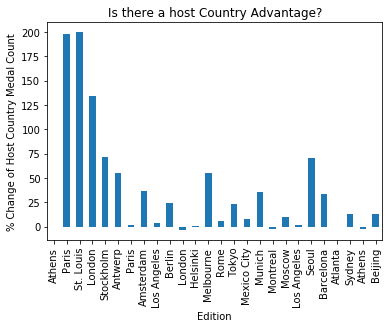

In [97]:
ax = influence['Change'].plot(kind='bar')

ax.set_title('Is there a host Country Advantage?')
ax.set_ylabel('% Change of Host Country Medal Count')
ax.set_xticklabels(editions['City'])
plt.show()